<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/07_Decision_tree_and_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer

In [0]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:,:10]
y = breast_cancer.target

columns = ['radius','texture','Circumference','area','smoothness','compactness','dent','number_of_dent','Symmetry','fractal dimension']

df=DataFrame(data=X[:,:10],columns=columns)
df['objective_values']=y

In [0]:
X=df[['area','dent']].values
y=df['objective_values'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

In [9]:
# StandardScalerのインスタンスを作成する
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算する
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# 訓練データの標準化
X_train_std =sc.transform(X_train)
# テストデータの標準化
# テストデータは訓練データの平均と標準偏差を用いて計算する
X_test_std=sc.transform(X_test)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=2,max_features=None,random_state=42)

In [14]:
clf.fit(X_train_std,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [16]:
# テストデータの予測
pred = clf.predict(X_test_std)
# 予測の確認
print(pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [0]:
# 確率(パーセプトロンでは取得できない)
proba = clf.predict_proba(X_test_std)

In [18]:
proba[0]

array([0.03964758, 0.96035242])

In [0]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,pred)

0.9473684210526315

In [0]:
import numpy 
from matplotlib import pyplot
from mlxtend.plotting import plot_decision_regions

In [0]:
# すべてのデータをプロットすると多すぎるので制限する
N =100

#  訓練データとテストデータからN個ずつのサンプルを先頭から取ってくる
sampled_X = numpy.vstack((X_train_std[:N],X_test_std[:N]))
sampled_y = numpy.hstack((y_train[:N],y_test[:N]))

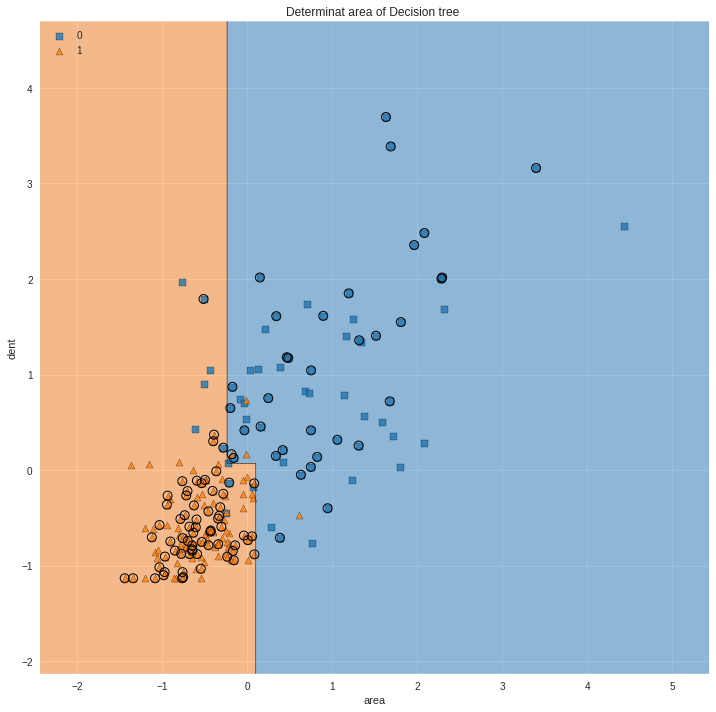

In [23]:
pyplot.figure(figsize=(12,12))
pyplot.xlabel("area")
pyplot.ylabel("dent")
pyplot.title("Determinat area of Decision tree ")


# 決定領域のプロット
plot_decision_regions(sampled_X,sampled_y,clf=clf,legend=2,X_highlight=X_test_std[:N])

In [24]:
!pip3 install graphviz

In [0]:
from sklearn.tree import export_graphviz

In [0]:
out = export_graphviz(clf,out_file=None,feature_names=['area','dent'],class_names=['Malignancy','Benign'],label='all',filled=True,leaves_parallel=False,rotate=False,rounded=True, impurity=False)

In [0]:
import graphviz
# ノートブック上で graphviz の出力を可視化するために必要
from IPython.display import display ,SVG

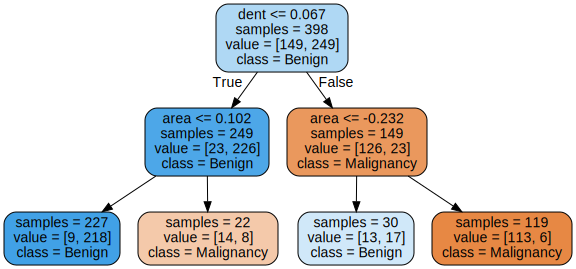

In [30]:
dot = graphviz.Source(out)
display(SVG(dot.pipe('svg')))

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(criterion='gini',max_depth=1,n_estimators=10,random_state=42)

In [34]:
rf.fit(X_train_std,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
# テストデータの予測
pred = rf.predict(X_test_std)
# 予測の確認
print(pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [0]:
# 　確率(パーセプトロンでは取得できない)
proba = rf.predict_proba(X_test_std)

In [37]:
proba[0]

array([0.12279022, 0.87720978])

In [0]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,pred)

0.9532163742690059

決定木よりもランダムフォレストのほうが正解率が高いことがわかる

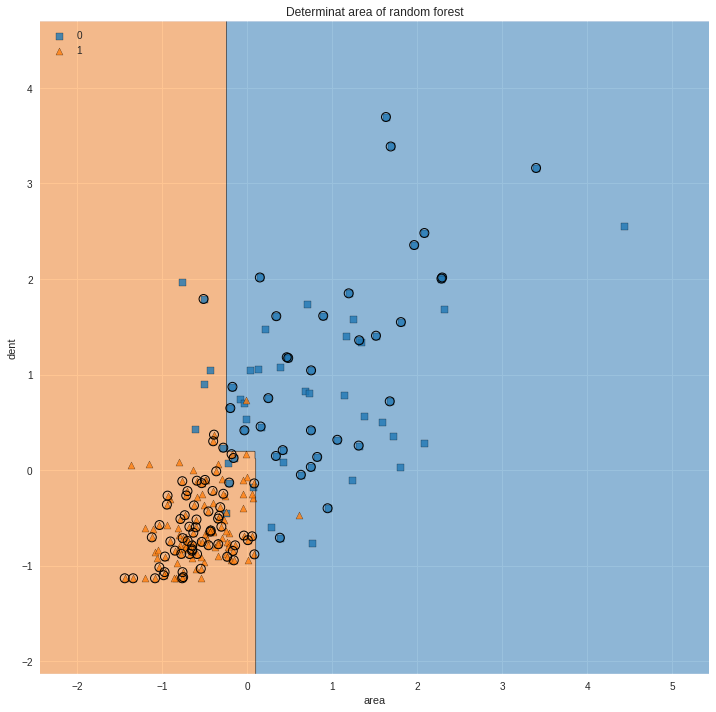

In [40]:
pyplot.figure(figsize=(12, 12))
pyplot.xlabel("area")
pyplot.ylabel("dent")
pyplot.title("Determinat area of random forest")

# 決定領域のプロット
plot_decision_regions(sampled_X, sampled_y, clf=rf, legend=2,  X_highlight=X_test_std[:N])

Tree1


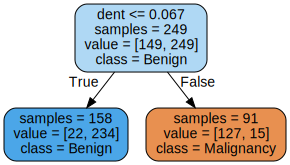


Tree2


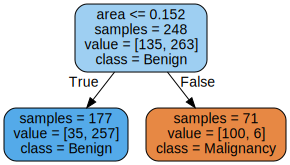


Tree3


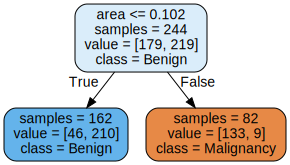


Tree4


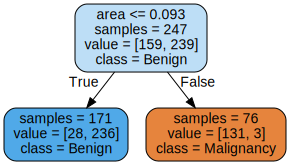


Tree5


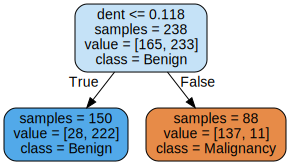


Tree6


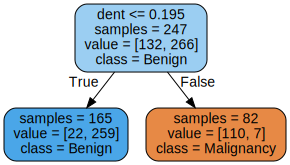


Tree7


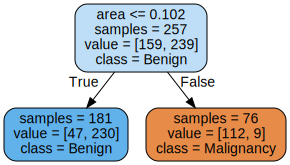


Tree8


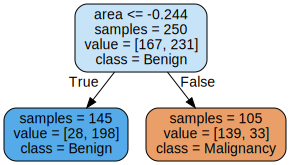


Tree9


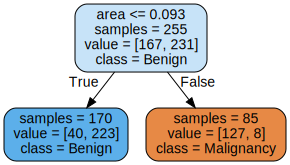


Tree10


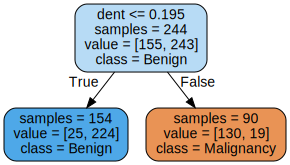

In [44]:
from IPython.display import display, SVG

# 学習した決定木はestimators_に格納されている
for i, tree in enumerate(rf.estimators_,start=1):
  print(f"Tree{i}")
  out = export_graphviz(tree,out_file=None,feature_names=['area','dent'],class_names=['Malignancy','Benign'],
                       label='all',filled=True,leaves_parallel=False,rotate=False,rounded=True,impurity=False)
  dot = graphviz.Source(out)
  display(SVG(dot.pipe('svg')))
  print()

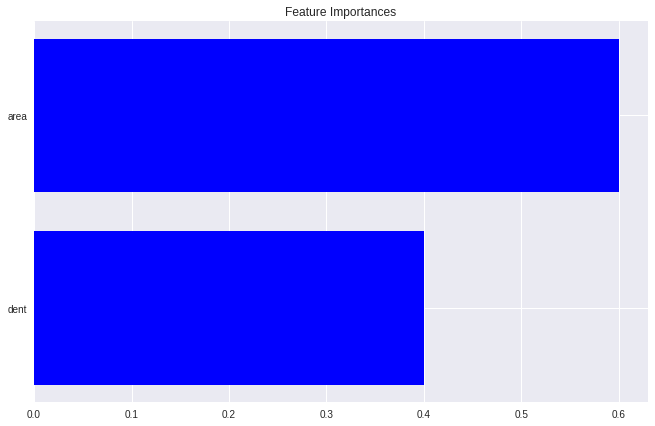

In [47]:
feature_names = numpy.array(['area','dent'])
# 特徴重要度はfeature_importances_に格納されている
feature_importances=rf.feature_importances_
indices = numpy.argsort(feature_importances)

pyplot.figure(figsize=(11,7))
pyplot.title('Feature Importances')
pyplot.barh(range(len(indices)),feature_importances[indices],color='b',align='center')
pyplot.yticks(range(len(indices)),feature_names[indices])
pyplot.show()